In [10]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Define paths

In [58]:
root = Path('/nfs/students/summer-term-2018/project_2/data/YT_CAR_DRIVING/')
imsize = 128

path_data = root / ('data' + str(imsize) + '.npy')
path_lm = root / 'landmarks.npy'
path_histo = root / 'histo.npy'
path_embeddings = root / 'embeddings.npy'

# Load data

In [60]:
data = np.load(path_data)
landmarks = np.load(path_lm)
histo = np.load(path_histo)
embeddings = np.load(path_embeddings)
print('Data shape', data.shape, 'Data dtype', data.dtype)
print('Landmarks shape', landmarks.shape, 'Landmarks dtype', landmarks.dtype)
print('Histo shape', histo.shape, 'Histo dtype', histo.dtype)
print('Embeddings shape', embeddings.shape, 'Embeddings dtype', embeddings.dtype)

Data shape (5812, 3, 128, 128) Data dtype uint8
Landmarks shape (5812, 144) Landmarks dtype float64
Histo shape (5812, 768) Histo dtype float64
Embeddings shape (5812, 128) Embeddings dtype float64


# Plot sample

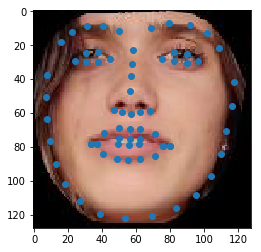

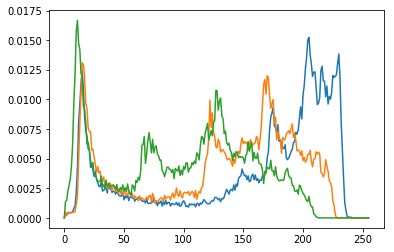

In [57]:
n = 302

plt.scatter(landmarks[n,::2]*imsize, landmarks[n,1::2]*imsize)
plt.imshow(data[n].transpose((1,2,0)))
plt.show()
plt.plot(np.arange(256), histo[n,:256].reshape((256)))
plt.plot(np.arange(256), histo[n,256:512].reshape((256)))
plt.plot(np.arange(256), histo[n,512:768].reshape((256)))
plt.title('Histogram')
plt.show()
plt.plt(np.arange(128), embeddings[n], )
plt.title('Embeddings')

In [27]:
x = np.load('/home/stromaxi/x_.npy')
y = np.load('/home/stromaxi/y_.npy')

In [32]:
x = x.transpose((0,2,3,1))

In [37]:
np.max(x)

255.0

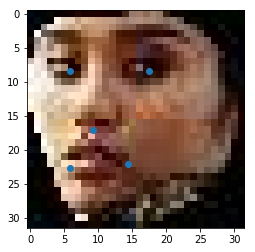

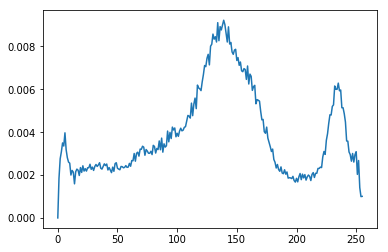

In [38]:
plt.scatter(y[0,::2]*32, y[0,1::2]*32)
plt.imshow(np.uint(x[0]))
plt.show()
plt.plot(np.arange(256), histo[0,:256].reshape((256)))

In [101]:
import ast
separator = '        '

def convert_buffer_to_dict(buffer_file):
    """
    Converts the landmarks from the buffer file  to a dict
    :param buffer_file: Path to the buffer file
    :return: Landmarks stored in a dict
    """
    # Extract lines from file and remove separator
    with open(buffer_file) as buffer:
        buffered_lines = buffer.readlines()
    # Extract separators
    buffered_lines = [line.strip() for line in buffered_lines]
    buffered_lines = [line.split(separator) for line in buffered_lines]
    # Save landmarks in dict
    storage = {}
    for filename, data in buffered_lines:
        storage[filename] = ast.literal_eval(data)
    return storage


In [102]:
storage = convert_buffer_to_dict(buffer_file)

In [103]:
len(storage)

194701

In [105]:
import json
embeddings_json = Path('/nfs/students/summer-term-2018/project_2/data/CelebA/embeddings.json')
with open(embeddings_json, 'w') as em_json:
    json.dump(storage, em_json)

In [106]:
# Convert landmarks dict to array
embeddings_array = np.array(list(storage.values()))

In [111]:
print(embeddings_array.dtype)
print(embeddings_array.shape)

float32
(194701, 128, 1, 1)


In [110]:
embeddings_array = embeddings_array.reshape((-1,128,1,1))
embeddings_array = embeddings_array.astype('float32')

In [112]:
np.save('/nfs/students/summer-term-2018/project_2/data/CelebA/embeddings.npy', embeddings_array)